In [8]:
#Feature Scaling
##standardization/normalization, transformation, aggregation, discretization/binarization, sampling

In [1]:
#import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler #used in Standardization, MinMax-Normalization
from sklearn.decomposition import PCA   #dimensionality reduction

In [3]:
#set display option
pd.set_option('display.max_columns', None)

In [5]:
#mount Google drive with notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#read csv file available on Google drive
df = pd.read_csv('/content/drive/My Drive/Datasets/winequality_red.csv')

In [7]:
#print first 5 rows of dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [9]:
#columns in the dataset
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [25]:
#infrmation for data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [14]:
#statistical information for the dataset
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

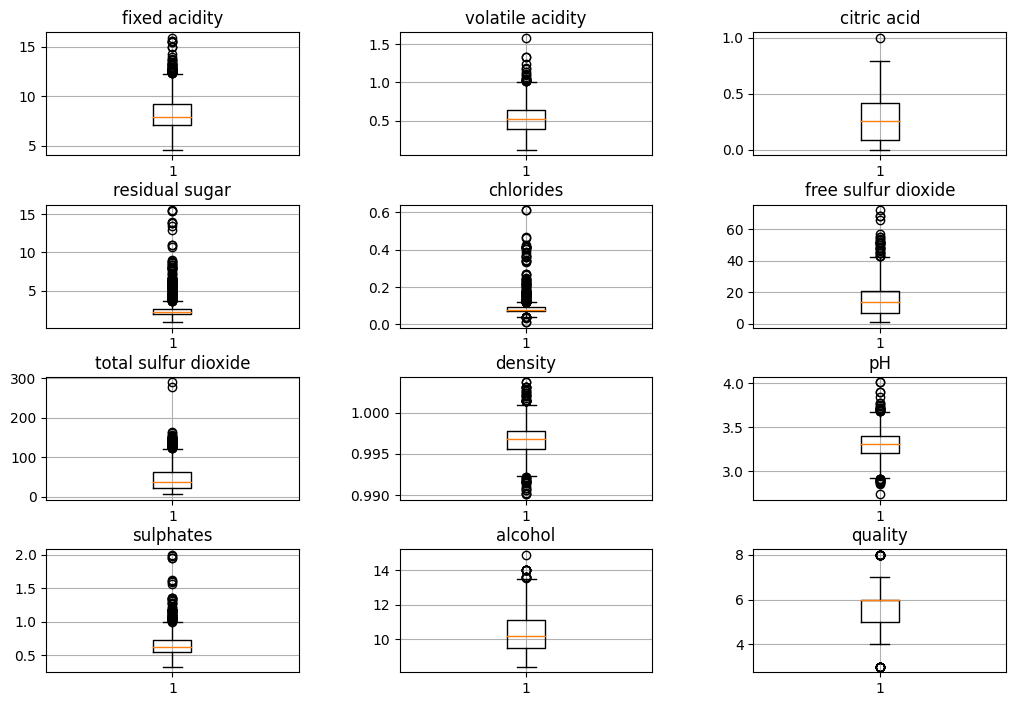

In [19]:
#Visualizing the Data Distribution
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming your DataFrame is already loaded into the variable 'df'

# Calculate the number of rows and columns for subplots
num_cols = df.select_dtypes(include=['int', 'float']).shape[1]
num_rows = math.ceil(num_cols / 3)  # Assuming you want 3 columns in each row

# Set the size of the main plot (width, height)
plt.figure(figsize=(12, 8))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Iterate over numerical columns and create box plots
for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns per row as needed
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)

plt.show()


In [20]:
##STANDARDIZATION

In [21]:
#apply standardization on df
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df) #fit and transform on data
wine_df = pd.DataFrame(data = scaled_data, columns = df.columns) #standardized data

In [22]:
#print standardized data
print(wine_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  

In [26]:
#information details of standardized data
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB
None


In [23]:
#get statistical description
print(wine_df.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.554936e-16      1.733031e-16 -8.887339e-17   -1.244227e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   3.732682e-16        -6.221137e-17          4.443669e-17 -3.473172e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.4

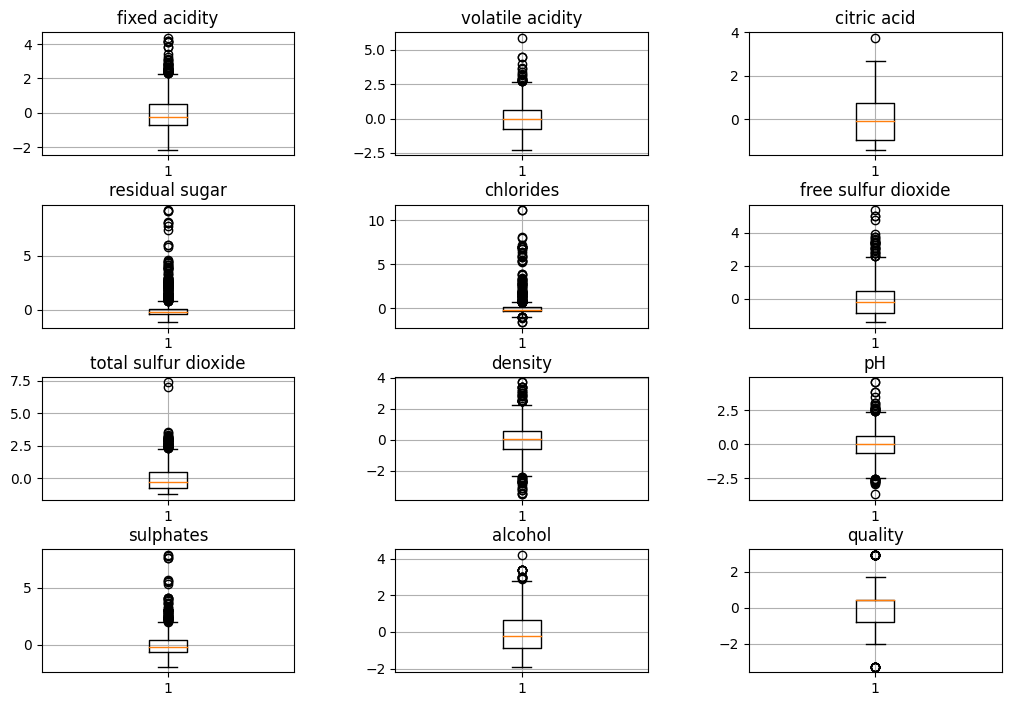

In [24]:
#Distribution Visualization

# Calculate the number of rows and columns for subplots
num_cols = wine_df.select_dtypes(include=['int', 'float']).shape[1]
num_rows = math.ceil(num_cols / 3)  # Assuming you want 3 columns in each row

# Set the size of the main plot (width, height)
plt.figure(figsize=(12, 8))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Iterate over numerical columns and create box plots
for i, col in enumerate(wine_df.select_dtypes(include=['int', 'float']).columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns per row as needed
    plt.boxplot(wine_df[col])
    plt.title(col)
    plt.grid(True)

plt.show()


In [27]:
##NORMALIZATION - Min Max

In [28]:
scalar1 = MinMaxScaler()
scaled_data1 = scalar.fit_transform(df) #fit and transform on original data
wine_df1 = pd.DataFrame(data = scaled_data, columns = df.columns) #normalized data

In [29]:
#print normalized data
print(wine_df1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  

In [30]:
#information details of normalized data
print(wine_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB
None


In [31]:
#get statistical description
print(wine_df1.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.554936e-16      1.733031e-16 -8.887339e-17   -1.244227e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   3.732682e-16        -6.221137e-17          4.443669e-17 -3.473172e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.4

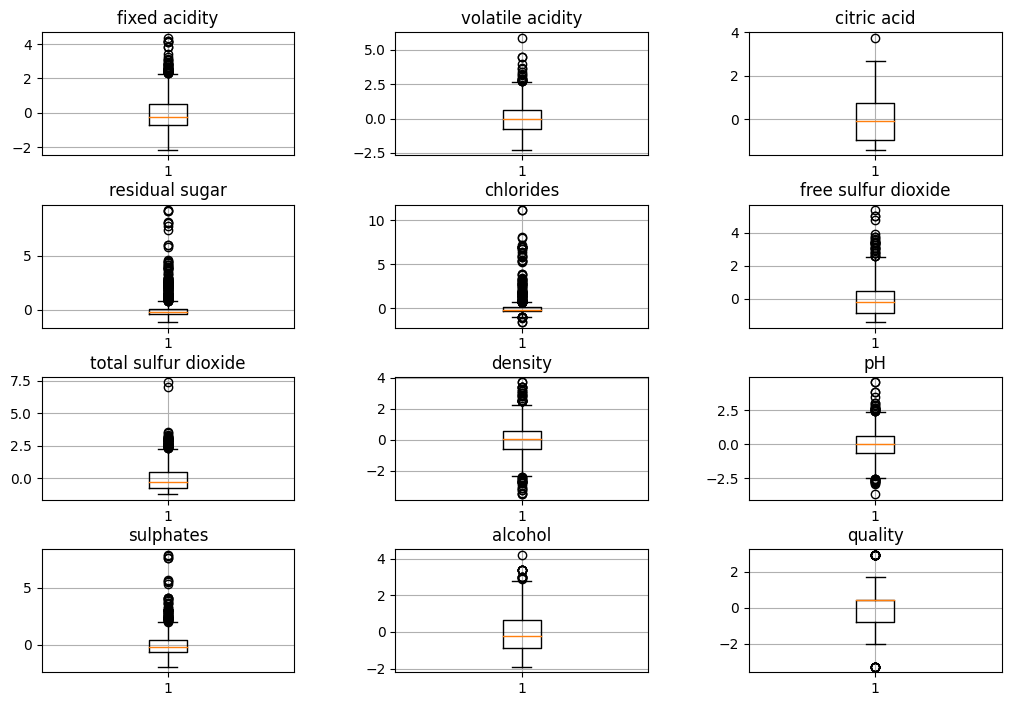

In [32]:
#Distribution Visualization

# Calculate the number of rows and columns for subplots
num_cols = wine_df1.select_dtypes(include=['int', 'float']).shape[1]
num_rows = math.ceil(num_cols / 3)  # Assuming you want 3 columns in each row

# Set the size of the main plot (width, height)
plt.figure(figsize=(12, 8))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Iterate over numerical columns and create box plots
for i, col in enumerate(wine_df1.select_dtypes(include=['int', 'float']).columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns per row as needed
    plt.boxplot(wine_df1[col])
    plt.title(col)
    plt.grid(True)

plt.show()

In [33]:
##DIMENSIONALITY REDUCTION

In [36]:
# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)
# Perform PCA on all columns of the DataFrame
reduced_data = pca.fit_transform(df)
# reduced_data now contains the reduced dimensional representation of the data

In [37]:
#print reduced data
print(reduced_data)

[[-13.22202658  -2.03192212]
 [ 22.04025471   4.40179054]
 [  7.16536169  -2.50832073]
 ...
 [ -3.43293096  14.27427694]
 [  1.13557385  16.30769238]
 [ -3.87592057   3.13011173]]


In [42]:
#convert reduced data to a dataframe for better comparison and outlook
wine_df2 = pd.DataFrame(reduced_data)

In [41]:
#information details of normareduced data
print(wine_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1599 non-null   float64
 1   1       1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB
None


In [43]:
#get statistical description
print(wine_df2.describe())

                  0             1
count  1.599000e+03  1.599000e+03
mean   1.421974e-15 -5.687897e-16
std    3.367237e+01  7.612032e+00
min   -4.233162e+01 -3.187364e+01
25%   -2.538003e+01 -4.168432e+00
50%   -8.791846e+00 -1.546264e+00
75%    1.697706e+01  3.532393e+00
max    2.413987e+02  3.395163e+01


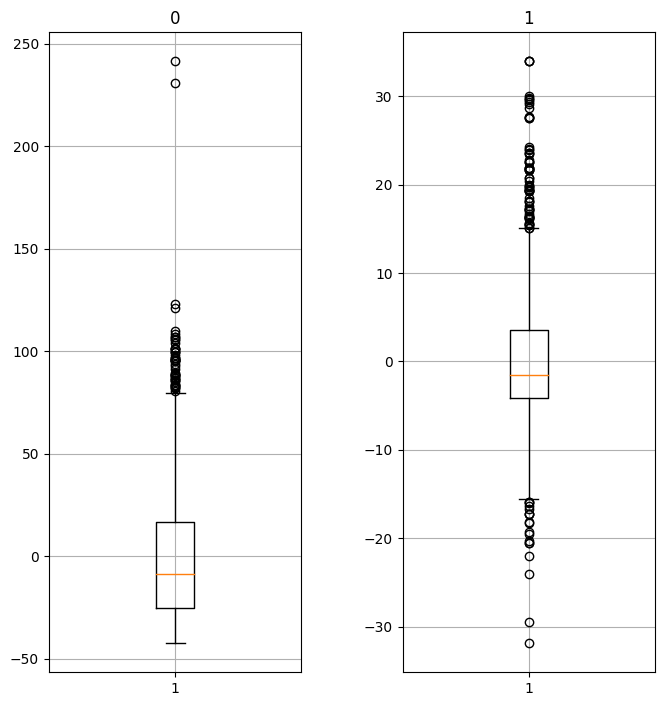

In [44]:
#Distribution Visualization

# Calculate the number of rows and columns for subplots
num_cols = wine_df2.select_dtypes(include=['int', 'float']).shape[1]
num_rows = math.ceil(num_cols / 3)  # Assuming you want 3 columns in each row

# Set the size of the main plot (width, height)
plt.figure(figsize=(12, 8))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Iterate over numerical columns and create box plots
for i, col in enumerate(wine_df2.select_dtypes(include=['int', 'float']).columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns per row as needed
    plt.boxplot(wine_df2[col])
    plt.title(col)
    plt.grid(True)

plt.show()

In [45]:
##DISCRETIZATION

In [47]:
#continous data of Alcohol column is being converted into five discrete bins labeled "VG", "G", "A", "B", and "VB"
df['alcohol_bins'] = pd.cut(df['alcohol'], bins = 5, labels = ["VG", "G", "A", "B", "VB"]) #label denotes the quality of alcohol - VeryGood, Good, Average, Bad, VeryBad

In [48]:
print(df['alcohol_bins']) #column with discrete labels

0       VG
1        G
2        G
3        G
4       VG
        ..
1594     G
1595     A
1596     G
1597     G
1598     G
Name: alcohol_bins, Length: 1599, dtype: category
Categories (5, object): ['VG' < 'G' < 'A' < 'B' < 'VB']


In [49]:
##BINARIZATION

In [50]:
#continuous or categorical data is converted into binary values (0s and 1s) based on a certain threshold.
df['high_sulphur_dioxide'] = (df['total sulfur dioxide'] > df['total sulfur dioxide'].mean()).astype(int)
#compares each value in the 'total sulfur dioxide' column of the DataFrame df with the mean value of the 'total sulfur dioxide' column. It returns a boolean Series where each value is True if the corresponding value in the 'total sulfur dioxide' column is greater than the mean, and False otherwise, then converts True and False to 0 and 1

In [52]:
print(df['high_sulphur_dioxide']) #new column with boolean values

0       0
1       1
2       1
3       1
4       0
       ..
1594    0
1595    1
1596    0
1597    0
1598    0
Name: high_sulphur_dioxide, Length: 1599, dtype: int64
